# Modelling and Evaluation

## Objective:
 * Answer business requirement 2:
    * The client is interested in predicting if a cherry leaf is healthy or contains powdery mildew.
## Inputs
* inputs/mildew_dataset/cherry-leaves/train
* inputs/mildew_dataset/cherry-leaves/test
* inputs/mildew_dataset/cherry-leaves/validation
* image shape embeddings

## Outputs
* Images distribution plot in train, validation, and test set
* Image augmentation.
* Class indices to change prediction inference in labels
* Machine learning model creation and training
* Save trained model
* Learning curve plot for model performance
* Model evaluation on pickle file
* Prediction on the random image file

---

# Set Data Directory

## Import packages

In [1]:
! pip install -r /workspaces/Project-5-Mildew-detection-leaves-images-identification/requirements.txt

e 7)) (5.3.1)


In [2]:
# Import regular packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

## Change working directory

* To change the working directory from its current folder to its parent folder
* To access the current directory with os.getcwd()

In [3]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/Project-5-Mildew-detection-leaves-images-identification/jupyter_notebooks'

**To make the parent of the current directory the new current directory**
* os.path.dirname() gets the parent directory
* os.chdir() defines the new current directory

In [4]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


**To confirm the new current directory**

In [5]:
current_dir = os.getcwd()
current_dir

'/workspaces/Project-5-Mildew-detection-leaves-images-identification'

## Set input directories
### Set train, validation, and test sets paths

In [6]:
# Set paths for train, validation, and test sets
my_data_dir = 'inputs/mildew_dataset/cherry-leaves'
train_path = my_data_dir + '/train'
validation_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'

## Set output directories

In [7]:
# Set output directories
version = 'v1' 
file_path =f'outputs/{version}'

if 'outputs' in os.listdir(current_dir) and version in os.listdir(current_dir + '/outputs'): 
    print('Existing version already available create a new version')
    pass 
else:
    os.makedirs(name=file_path)

Existing version already available create a new version


## Set label names

In [8]:
# Set label names
labels = os.listdir(train_path)
print('Label for the images is', labels)

Label for the images is ['powdery_mildew', 'healthy']


---

# Set image shape

In [9]:
## Import saved image shape embedding
import joblib
version = 'v1'
image_shape = joblib.load(filename=f"outputs/{version}/image_shape.pkl")
image_shape

(256, 256, 3)

## Identify Number of Images in train, validation, and test data

* train - powdery_mildew: 1472 images
* train - healthy: 1472 images
* validation - powdery_mildew: 210 images
* validation - healthy: 210 images
* test - powdery_mildew: 422 images
* test - healthy: 422 images




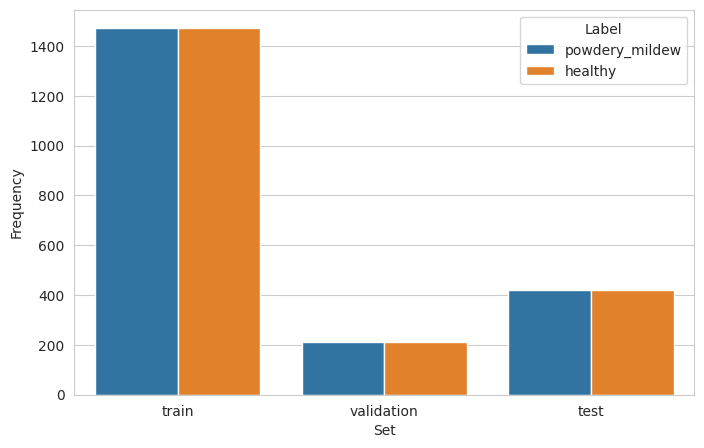

In [10]:
df_freq = pd.DataFrame([]) 
for folder in ['train', 'validation', 'test']:
  for label in labels:
    df_freq = df_freq.append(
        pd.Series(data={'Set': folder,
                        'Label': label,
                        'Frequency':int(len(os.listdir(my_data_dir+'/'+ folder + '/' + label)))}
                  ),
        ignore_index=True
    )
    
    print(f"* {folder} - {label}: {len(os.listdir(my_data_dir+'/'+ folder + '/' + label))} images")

print("\n")
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
sns.barplot(data=df_freq, x='Set', y='Frequency', hue='Label')
plt.savefig(f'{file_path}/labels_distribution.png', bbox_inches='tight', dpi=150)
plt.show()

---

# Image data augmentation

The dataset only shows a limited number of images, therefore there is a need to augment the images to increase the learning capacity of the machine learning model.

## ImageDataGenerator
### Import ImageDataGenerator form Tensorflow

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Initialize the ImageDataGenerator

In [12]:
augmented_image_data = ImageDataGenerator(rotation_range=15,
                                   width_shift_range=0.12, 
                                   height_shift_range=0.10,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest',
                                   rescale=1./255
                              )

## Augment training image dataset

In [13]:
# Set the batch size
batch_size = 20 
# Augment training image dataset
train_set = augmented_image_data.flow_from_directory(train_path,
                                              target_size=image_shape[:2],
                                              color_mode='rgb',
                                              batch_size=batch_size,
                                              class_mode='binary',
                                              shuffle=True
                                              )

train_set.class_indices

Found 2944 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

## Augment validation image dataset

In [14]:
# Augment validation image dataset
validation_set = ImageDataGenerator(rescale=1./255).flow_from_directory(validation_path,
                                                          target_size=image_shape[:2],
                                                          color_mode='rgb',
                                                          batch_size=batch_size,
                                                          class_mode='binary',
                                                          shuffle=False
                                                          )

validation_set.class_indices

Found 420 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

## Augment test image dataset

In [15]:
# Augment test image dataset
test_set = ImageDataGenerator(rescale=1./255).flow_from_directory(test_path,
                                                    target_size=image_shape[:2],
                                                    color_mode='rgb',
                                                    batch_size=batch_size,
                                                    class_mode='binary',
                                                    shuffle=False
                                                    )

test_set.class_indices

Found 844 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

## Plot augmented training images

(20, 256, 256, 3)


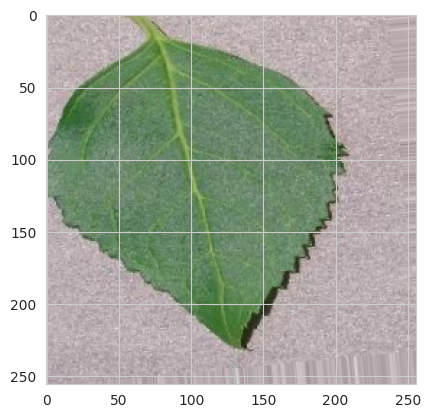

(20, 256, 256, 3)


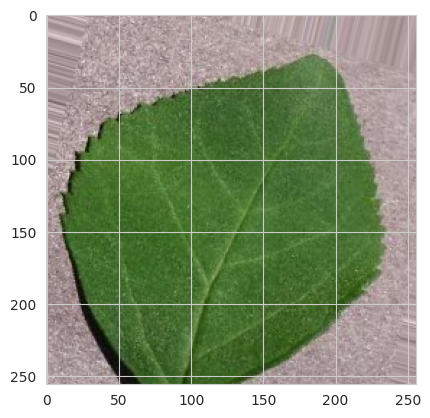

(20, 256, 256, 3)


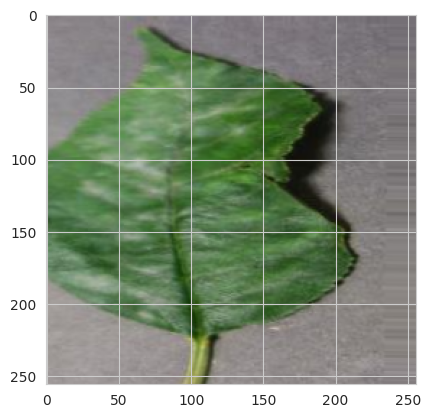

In [16]:
# Plot augmented training images
for _ in range(3):
    img, label = train_set.next()
    print(img.shape)   #  (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

## Plot augmented validation images

(20, 256, 256, 3)


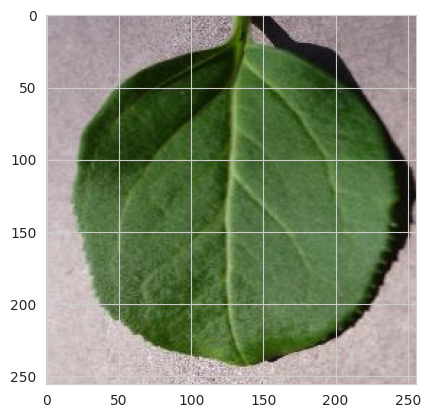

(20, 256, 256, 3)


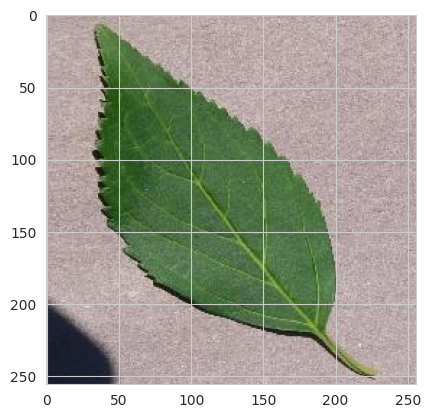

(20, 256, 256, 3)


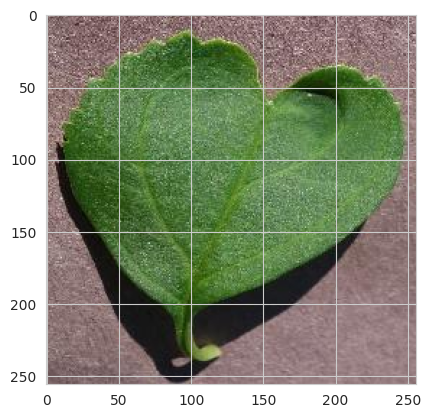

In [17]:
# Plot augmented validation images
for _ in range(3):
    img, label = validation_set.next()
    print(img.shape)   #  (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

## Plot augmented test images

(20, 256, 256, 3)


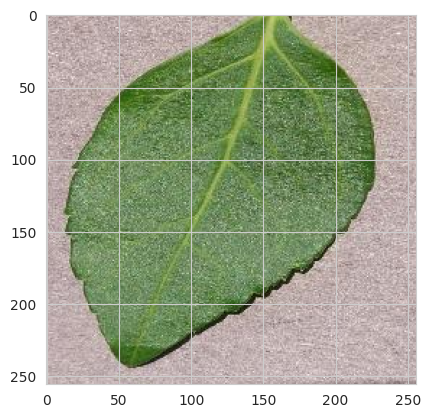

(20, 256, 256, 3)


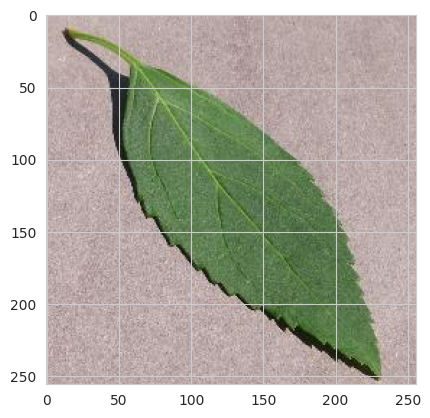

(20, 256, 256, 3)


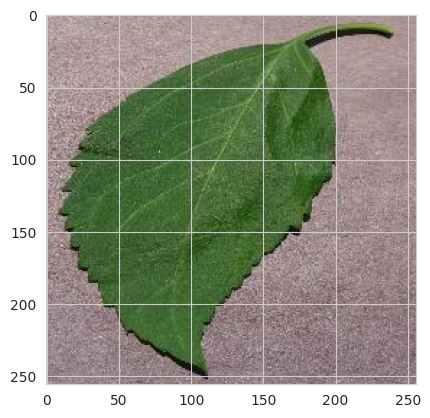

In [18]:
# Plot augmented test images
for _ in range(3):
    img, label = test_set.next()
    print(img.shape)   
    plt.imshow(img[0])
    plt.show()

## Save class indices

In [19]:
# Save class indices as a pickle file
joblib.dump(value=train_set.class_indices ,
            filename=f"{file_path}/class_indices.pkl")

['outputs/v1/class_indices.pkl']

---

# Model creation
## Create the machine learning Model

## Import model packages

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow import keras
import keras_tuner

### Function to create model

In [21]:
# Declare a function to create model
def build_tf_model():
    """
    Convolution layers to filter the dominant pixel values from the non-dominant. 
    Maxpooling to reduce the image to only the dominant pixel values. 
    As a result the complexity is reduced and the accuracy increased.
    The activation types used are relu (rectified linerar activation function) 
    and sigmoid (logistic regression classification function).
    """ 
    # https://machinelearningmastery.com/choose-an-activation-function-for-deep-learning/
    model = Sequential()
    
    # Convolution layers
    model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=image_shape, activation='relu',))
    # Maxpooling layers
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(filters=64, kernel_size=(4,4), input_shape=image_shape, activation='relu',))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(filters=64, kernel_size=(4,4), input_shape=image_shape, activation='relu',))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    # The Flatten layer to transform the matrix into a vector (a single list of all values)
    model.add(Flatten())
    # The Vector produced from the Flatten is fed to the Dense layer
    # The Dense layer to perform the mathematical calculation and provides the output 
    model.add(Dense(128, activation = 'relu'))
    
    # Dropout layer 
    model.add(Dropout(0.5))
    model.add(Dense(1, activation = 'sigmoid'))
    
    model.compile(

        loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy']
                  )
    return model

## Model Summary

In [22]:
build_tf_model().summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 253, 253, 32)      1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 123, 123, 64)      32832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 61, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 58, 58, 64)        65600     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 29, 29, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 53824)             0

## Function to create Keras tuning model

In [23]:
# Declare function to create Keras tuning model
def build_tf_model(units, activation, dropout, lr):
    model = keras.Sequential()
    model.add(Flatten())
    model.add(Dense(units=units, activation=activation))
    if dropout:
        model.add(Dropout(rate=0.25))
    model.add(Dense(10, activation="softmax"))
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=lr),
        loss="binary_crossentropy",
        metrics=["accuracy"],
    )
    return model

# Function to build model
def build_model(hp):
    units = hp.Int("units", min_value=32, max_value=512, step=32)
    activation = hp.Choice("activation", ["relu", "tanh"])
    dropout = hp.Boolean("dropout")
    lr = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    # call existing model-building code with the hyperparameter values.
    model = build_tf_model(
        units=units, activation=activation, dropout=dropout, lr=lr
    )
    return model


build_model(keras_tuner.HyperParameters())

## Initialise the tuner
### Set path for the search results

In [24]:
tune_results = my_data_dir + '/tune'

In [25]:
# Initialise the tuner
tuner = keras_tuner.RandomSearch(
    hypermodel=build_model,
    objective="val_accuracy",
    max_trials=5,
    executions_per_trial=2,
    overwrite=True,
    directory="tune_results",
    project_name="mildew-detection",
)

### Summary of the search space

In [26]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
dropout (Boolean)
{'default': False, 'conditions': []}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}


## Prepare the MNIST dataset to inform the tuning search

In [27]:
from tensorflow import keras
import numpy as np

# To prepare the MNIST dataset to inform the tuning search
(x, y), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x[:-10000]
x_validation = x[-10000:]
y_train = y[:-10000]
y_validation = y[-10000:]

x_train = np.expand_dims(x_train, -1).astype("float32") / 255.0
x_validation = np.expand_dims(x_validation, -1).astype("float32") / 255.0
x_test = np.expand_dims(x_test, -1).astype("float32") / 255.0

num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_validation = keras.utils.to_categorical(y_validation, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

### Search for the best hyperparameter configuration

In [ ]:
tuner.search(x_train, y_train, epochs=5, validation_data=(x_validation, y_validation))

### Query the search results

In [ ]:
# To get the top two models
models = tuner.get_best_models(num_models=2)
best_model = models[0]
# Build the model
# This is needed for 'Sequential' without specified 'input_shape'
best_model.build(input_shape=(None, 28, 28))
best_model.summary()

## Re-instantiate the original model and train

In [ ]:
def build_tf_model():
    """
    Convolution layers to filter the dominant pixel values from the non-dominant. 
    Maxpooling to reduce the image to only the dominant pixel values. 
    As a result the complexity is reduced and the accuracy increased.
    The activation types used are relu (rectified linerar activation function) 
    and sigmoid (logistic regression classification function).
    """ 
    # https://machinelearningmastery.com/choose-an-activation-function-for-deep-learning/
    model = Sequential()
    
    # Convolution layers
    model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape, activation='relu',))
    # Max pooling layers
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_shape, activation='relu',))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_shape, activation='relu',))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    # The Flatten layer transforms the matrix into a vector (a simgle list f all values)
    model.add(Flatten())
    # The Vector produced from the Flatten is fed to the Dense layer
    # The Dense layer to perform the mathematical calculation and provides the output 
    model.add(Dense(128, activation = 'relu'))
    
    # Dropout layer 
    model.add(Dropout(0.5))
    model.add(Dense(1, activation = 'sigmoid'))
    
    model.compile(

        loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy']
                  )
    return model

## Early stopping

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=3)

## Fit model for model training

In [ ]:
model =  model = build_tf_model()
model.fit(train_set,
          epochs=25,
          steps_per_epoch = len(train_set.classes) // batch_size,
          validation_data=validation_set,
          callbacks=[early_stop],
          verbose=1
          )

## Save the model

In [ ]:
model.save('outputs/v1/mildew_detection_model.h5')

---

# Model Performance

## Learning curve of the model

In [ ]:
losses = pd.DataFrame(model.history.history)

sns.set_style("whitegrid")
losses[['loss','val_loss']].plot(style='.-')
plt.title("Loss")
plt.savefig(f'{file_path}/model_training_losses.png', bbox_inches='tight', dpi=150)
plt.show()

print("\n")
losses[['accuracy','val_accuracy']].plot(style='.-')
plt.title("Accuracy")
plt.savefig(f'{file_path}/model_training_acc.png', bbox_inches='tight', dpi=150)
plt.show()

## Model Evaluation
### Load the saved model

In [ ]:
from keras.models import load_model
model = load_model('outputs/v1/mildew_detection_model.h5')

## Evaluate model using the test set

In [ ]:
evaluation = model.evaluate(test_set)

### Save the model evaluation as a pickle file

In [ ]:
joblib.dump(value=evaluation ,
            filename=f"outputs/v1/model_evaluation.pkl")

## Test prediction using a random image
### Load a random image as PIL

In [ ]:
from tensorflow.keras.preprocessing import image

pointer = 27
label = labels[0] # select Healthy or Infected

pil_image = image.load_img(test_path + '/'+ label + '/'+ os.listdir(test_path+'/'+ label)[pointer],
                          target_size=image_shape, color_mode='rgb')
print(f'Image shape: {pil_image.size}, Image mode: {pil_image.mode}')
pil_image

### Convert image to array and prepare for prediction

In [ ]:
my_arr_image = image.img_to_array(pil_image)
my_arr_image = np.expand_dims(my_arr_image, axis=0)/255
print(my_arr_image.shape)

### Predict class probabilities

In [ ]:
pred_prob = model.predict(my_arr_image)[0, 0]

target_map = {v: k for k, v in train_set.class_indices.items()}
pred_class = target_map[pred_prob > 0.5]  

if pred_class == target_map[0]: 
    pred_prob = 1 - pred_prob

print(pred_prob)
print(pred_class)

---

# Conclusions

* ML model performance matrics show that model was trained, validated, and tested using the available image dataset.
* ML model performance matrics show an accuracy higher than the required 97% on both the train and test set.
* The tuning results show that Keras tuning model was build well for hyperparameter optimization.

---

# Push files to Repo
## Push generated/new files from this Session to GitHub repository

### Git status

In [ ]:
!git status

### Git add

In [ ]:
!git add .

### Git commit 

In [ ]:
!git commit -am "save model"

### Git push

In [ ]:
!git push